In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [34]:
df = pd.read_csv("Mall_Customers.csv",index_col= 'CustomerID')

In [35]:
df.head()

,Genre,Age,Annual_Income_(k$),Spending_Score
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [36]:
df.shape

(200, 4)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Genre               200 non-null    object
 1   Age                 200 non-null    int64 
 2   Annual_Income_(k$)  200 non-null    int64 
 3   Spending_Score      200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [38]:
df.isna().sum()

Genre                 0
Age                   0
Annual_Income_(k$)    0
Spending_Score        0
dtype: int64

In [39]:
df['Genre'].value_counts()

Female    112
Male       88
Name: Genre, dtype: int64

In [40]:
df.describe()

,Age,Annual_Income_(k$),Spending_Score
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [41]:
df[df.duplicated()]

,Genre,Age,Annual_Income_(k$),Spending_Score
CustomerID,,,,


In [55]:
df.drop_duplicates(inplace = True)

<AxesSubplot:>

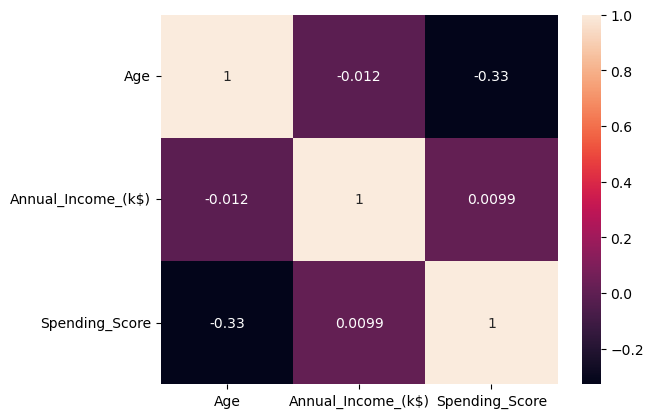

In [56]:
sns.heatmap(df.corr(),annot = True)

In [57]:
x = df.iloc[:,[2,3]].values

In [58]:
rd=[]

In [59]:
for i in range(1,11):
    kmeans = KMeans(n_clusters= i,init='k-means++',random_state = 42)
    kmeans.fit(x)
    rd.append(kmeans.inertia_)

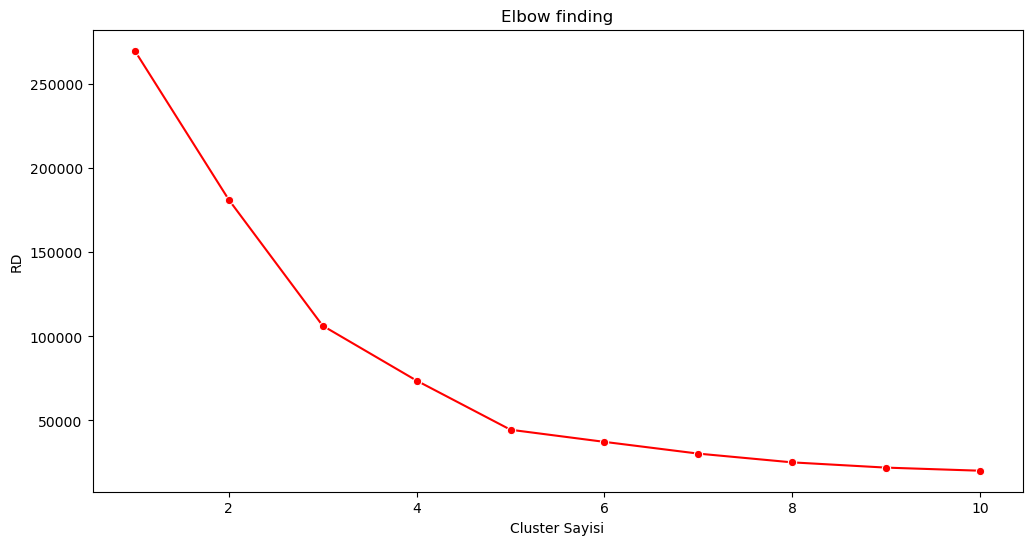

In [60]:
plt.figure(figsize = (12,6))
sns.lineplot(range(1,11), rd,marker = 'o',color = 'red')
plt.title('Elbow finding')
plt.xlabel('Cluster Sayisi')
plt.ylabel('RD')
plt.show()

In [61]:
k = 5
kmeans = KMeans(n_clusters= k,init='k-means++',random_state = 42)

In [62]:
y_pred = kmeans.fit_predict(x)

In [63]:
y_pred

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

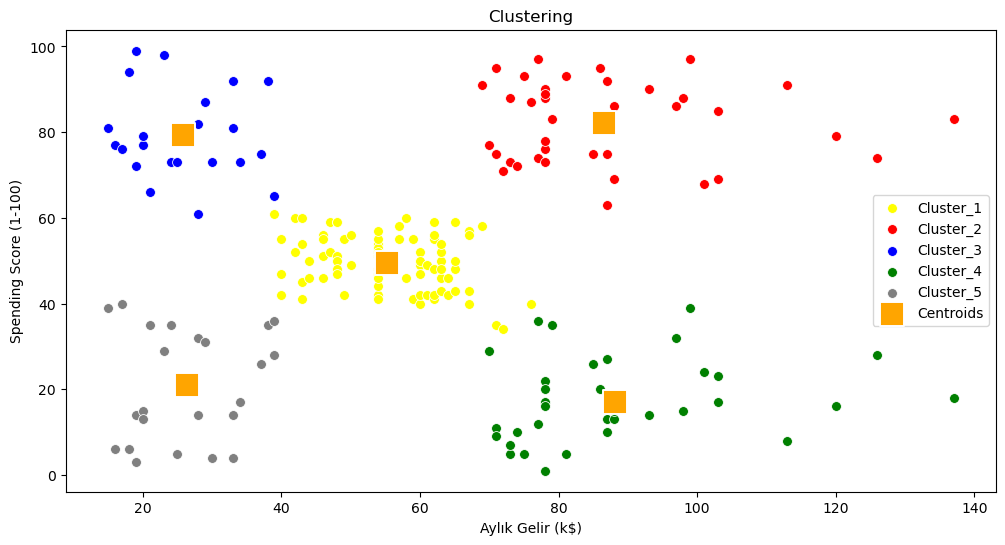

In [64]:
plt.figure(figsize = (12,6))

sns.scatterplot(x[y_pred == 0,0],x[y_pred == 0,1], color = 'yellow',label = 'Cluster_1',s = 50)
sns.scatterplot(x[y_pred == 1,0],x[y_pred == 1,1], color = 'red',label = 'Cluster_2',s = 50)
sns.scatterplot(x[y_pred == 2,0],x[y_pred == 2,1], color = 'blue',label = 'Cluster_3',s = 50)
sns.scatterplot(x[y_pred == 3,0],x[y_pred == 3,1], color = 'green',label = 'Cluster_4',s = 50)
sns.scatterplot(x[y_pred == 4,0],x[y_pred == 4,1], color = 'gray',label = 'Cluster_5',s = 50)

sns.scatterplot(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], color = 'orange',label = 'Centroids',s = 300,marker = ',')

plt.grid(False)
plt.title('Clustering')
plt.xlabel("Aylık Gelir (k$)")
plt.ylabel('Spending Score (1-100)')

plt.legend()
plt.show()